# Apple Banana Tomato Classification Mobilenet_v2

## Get images

In [50]:
!git clone https://github.com/lacakp/fruit-ds.git

Cloning into 'fruit-ds'...
remote: Enumerating objects: 17142, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17142 (delta 0), reused 2 (delta 0), pack-reused 17129
Receiving objects: 100% (17142/17142), 376.49 MiB | 34.57 MiB/s, done.
Resolving deltas: 100% (46/46), done.


## Check images

In [1]:
print("All train image in 3 class apple, banana, tomato")
!ls /content/fruit-ds/train/*/* | wc -l 

print("\n------------------")

print("Apple image count")
!ls /content/fruit-ds/train/apple/* | wc -l 

print("\n------------------")

print("Banana Image Count")
!ls /content/fruit-ds/train/banana/* | wc -l 

print("\n------------------")

print("Tomato Image Count")
!ls /content/fruit-ds/train/tomato/* | wc -l 

All train image in 3 class apple, banana, tomato
8003

------------------
Apple image count
3354

------------------
Banana Image Count
1430

------------------
Tomato Image Count
3219


## import MobileNetV2

In [2]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [3]:
model = MobileNetV2(weights='imagenet')

## Preparing train and validation data

### Import libraly

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

### Setting path and shape image

In [5]:
train_data_path = '/content/fruit-ds/train'
test_data_path = '/content/fruit-ds/test'
height = 224
width = 224
batch_size = 32

### Training data

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split = 0.3,
    subset = 'training',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 8003 files belonging to 3 classes.
Using 5603 files for training.


### Validation data

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split = 0.3,
    subset = 'validation',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 8003 files belonging to 3 classes.
Using 2400 files for validation.


### Get Class

In [8]:
classes = train_ds.class_names
print(classes)
print(train_ds)

['apple', 'banana', 'tomato']
<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


## Modifying the model

In [9]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### import libraly

In [10]:
from keras import Model
from keras.layers import Dense

### Custom model

In [11]:
abt_output = Dense(3, activation='softmax')
abt_output = abt_output(model.layers[-2].output)

abt_input = model.input
abt_model = Model(inputs=abt_input, outputs=abt_output)

for layer in abt_model.layers[:-1]:
  layer.trainable = False

### Compile model

In [12]:
abt_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Training the model

In [13]:
ABTFruit = abt_model.fit(train_ds,
                     validation_data = val_ds, 
                     epochs=10
                     )

Epoch 1/10
176/176 [==============================] - 29s 134ms/step - loss: 0.2481 - accuracy: 0.9311 - val_loss: 0.0812 - val_accuracy: 0.9954
Epoch 2/10
176/176 [==============================] - 22s 127ms/step - loss: 0.0611 - accuracy: 0.9950 - val_loss: 0.0407 - val_accuracy: 0.9983
Epoch 3/10
176/176 [==============================] - 23s 127ms/step - loss: 0.0353 - accuracy: 0.9973 - val_loss: 0.0264 - val_accuracy: 0.9987
Epoch 4/10
176/176 [==============================] - 22s 126ms/step - loss: 0.0243 - accuracy: 0.9986 - val_loss: 0.0192 - val_accuracy: 0.9992
Epoch 5/10
176/176 [==============================] - 23s 127ms/step - loss: 0.0178 - accuracy: 0.9991 - val_loss: 0.0145 - val_accuracy: 0.9992
Epoch 6/10
176/176 [==============================] - 22s 126ms/step - loss: 0.0138 - accuracy: 0.9996 - val_loss: 0.0115 - val_accuracy: 0.9996
Epoch 7/10
176/176 [==============================] - 22s 126ms/step - loss: 0.0112 - accuracy: 0.9996 - val_loss: 0.0095 - val_ac

## Graph

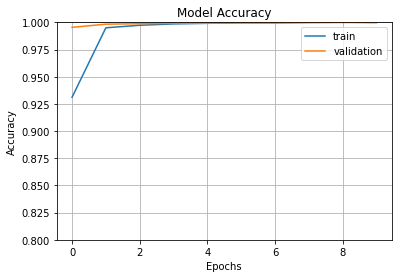

In [14]:
# Model Accuracy
plt.plot(ABTFruit.history['accuracy'])
plt.plot(ABTFruit.history['val_accuracy'])
plt.axis(ymin=0.8, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

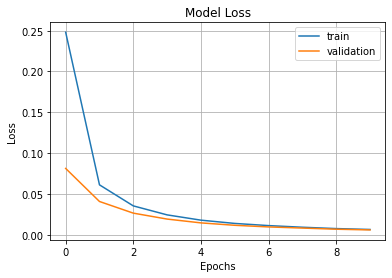

In [15]:
# Model Loss
plt.plot(ABTFruit.history['loss'])
plt.plot(ABTFruit.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Predictions

### Import library

In [33]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage.transform import resize

### Prediction values

In [51]:
image = cv2.imread('/content/fruit-ds/test/apple/apple (10).jpg')

resized = cv2.resize(image, (224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(resized)
img_array = tf.expand_dims(img_array, 0)
pred = abt_model.predict(img_array)
print(pred)

[[0.75518745 0.08155333 0.16325916]]


In [52]:
score = pred[0]
print(score)
print("แอปเปิล {:.2f} %".format(score[0]*100))
print("กล้วย {:.2f} %".format(score[1]*100))
print("มะเขือเทศ {:.2f} %".format(score[2]*100))

[0.75518745 0.08155333 0.16325916]
แอปเปิล 75.52 %
กล้วย 8.16 %
มะเขือเทศ 16.33 %


## prediction from test image

### Setting path of test images

In [53]:
test_data_path = '/content/fruit-ds/test'

### Prediction function

In [69]:
def abt_predict(image):
  """
  ฟังก์ชันสำหรับการทำนายภาพผลไม้ แอปเปื้ล กล้วย และมะเขือเทศ
  Prediction Function 
  args: image (<class 'numpy.ndarray'>)
  """
  resized = cv2.resize(image, (224, 224))
  img_array = tf.keras.preprocessing.image.img_to_array(resized)
  img_array = tf.expand_dims(img_array, 0)
  pred = abt_model.predict(img_array)
  score = pred[0]

  result = np.argmax(score)
  if result == 0:
    print('prediction: this is apple')
  if result == 1:
    print('prediction: this is banana')
  if result == 2:
    print("prediction: this is tomato")

  print("prediction score: Apple {:.2f} %".format(score[0]*100))
  print("prediction score: Banana {:.2f} %".format(score[1]*100))
  print("prediction score: Tomato {:.2f} %".format(score[2]*100))
  print("----------")
  return score

### view count of image and import library for random

In [70]:
print("All test image in 3 class apple, banana, tomato")
!ls /content/fruit-ds/test/*/* | wc -l 

print("\n------------------")

print("Apple image count")
!ls /content/fruit-ds/test/apple/* | wc -l 

print("\n------------------")

print("Banana Image Count")
!ls /content/fruit-ds/test/banana/* | wc -l 

print("\n------------------")

print("Tomato Image Count")
!ls /content/fruit-ds/test/tomato/* | wc -l 

All test image in 3 class apple, banana, tomato
2938

------------------
Apple image count
1100

------------------
Banana Image Count
484

------------------
Tomato Image Count
1354


### prediction use predict function by random image from test folder

In [79]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage.transform import resize
from random import randint

In [80]:
test_data_path = '/content/fruit-ds/test'

#### Apple

In [85]:
# Apple
apple_pred = []
for i in range(30):
  im = cv2.imread(f'{test_data_path}/apple/apple ({randint(1,1000)}).jpg')
  print(f"apple figure({i+1})")
  cv2_imshow(cv2.resize(im, (30, 30)))
  apple_pred.append(abt_predict(im))


apple figure(1)


prediction: this is apple
prediction score: Apple 96.57 %
prediction score: Banana 0.58 %
prediction score: Tomato 2.84 %
----------
apple figure(2)


prediction: this is tomato
prediction score: Apple 9.57 %
prediction score: Banana 0.52 %
prediction score: Tomato 89.90 %
----------
apple figure(3)


prediction: this is apple
prediction score: Apple 98.86 %
prediction score: Banana 0.29 %
prediction score: Tomato 0.85 %
----------
apple figure(4)


prediction: this is apple
prediction score: Apple 99.03 %
prediction score: Banana 0.08 %
prediction score: Tomato 0.89 %
----------
apple figure(5)


prediction: this is apple
prediction score: Apple 99.41 %
prediction score: Banana 0.15 %
prediction score: Tomato 0.44 %
----------
apple figure(6)


prediction: this is apple
prediction score: Apple 88.95 %
prediction score: Banana 0.29 %
prediction score: Tomato 10.75 %
----------
apple figure(7)


prediction: this is tomato
prediction score: Apple 1.68 %
prediction score: Banana 1.19 %
prediction score: Tomato 97.13 %
----------
apple figure(8)


prediction: this is apple
prediction score: Apple 93.16 %
prediction score: Banana 0.16 %
prediction score: Tomato 6.68 %
----------
apple figure(9)


prediction: this is apple
prediction score: Apple 58.60 %
prediction score: Banana 1.40 %
prediction score: Tomato 40.00 %
----------
apple figure(10)


prediction: this is apple
prediction score: Apple 95.22 %
prediction score: Banana 0.45 %
prediction score: Tomato 4.33 %
----------
apple figure(11)


prediction: this is apple
prediction score: Apple 72.81 %
prediction score: Banana 0.25 %
prediction score: Tomato 26.94 %
----------
apple figure(12)


prediction: this is apple
prediction score: Apple 99.47 %
prediction score: Banana 0.28 %
prediction score: Tomato 0.24 %
----------
apple figure(13)


prediction: this is apple
prediction score: Apple 99.74 %
prediction score: Banana 0.05 %
prediction score: Tomato 0.21 %
----------
apple figure(14)


prediction: this is apple
prediction score: Apple 77.79 %
prediction score: Banana 1.36 %
prediction score: Tomato 20.85 %
----------
apple figure(15)


prediction: this is apple
prediction score: Apple 73.71 %
prediction score: Banana 0.33 %
prediction score: Tomato 25.96 %
----------
apple figure(16)


prediction: this is tomato
prediction score: Apple 45.14 %
prediction score: Banana 0.06 %
prediction score: Tomato 54.81 %
----------
apple figure(17)


prediction: this is tomato
prediction score: Apple 5.64 %
prediction score: Banana 0.41 %
prediction score: Tomato 93.96 %
----------
apple figure(18)


prediction: this is tomato
prediction score: Apple 13.40 %
prediction score: Banana 1.16 %
prediction score: Tomato 85.44 %
----------
apple figure(19)


prediction: this is tomato
prediction score: Apple 9.84 %
prediction score: Banana 2.47 %
prediction score: Tomato 87.69 %
----------
apple figure(20)


prediction: this is tomato
prediction score: Apple 3.40 %
prediction score: Banana 5.88 %
prediction score: Tomato 90.72 %
----------
apple figure(21)


prediction: this is apple
prediction score: Apple 95.89 %
prediction score: Banana 0.23 %
prediction score: Tomato 3.88 %
----------
apple figure(22)


prediction: this is apple
prediction score: Apple 70.10 %
prediction score: Banana 0.17 %
prediction score: Tomato 29.73 %
----------
apple figure(23)


prediction: this is tomato
prediction score: Apple 32.64 %
prediction score: Banana 0.17 %
prediction score: Tomato 67.18 %
----------
apple figure(24)


prediction: this is apple
prediction score: Apple 83.24 %
prediction score: Banana 0.42 %
prediction score: Tomato 16.35 %
----------
apple figure(25)


prediction: this is apple
prediction score: Apple 52.39 %
prediction score: Banana 12.33 %
prediction score: Tomato 35.28 %
----------
apple figure(26)


prediction: this is apple
prediction score: Apple 73.85 %
prediction score: Banana 0.97 %
prediction score: Tomato 25.17 %
----------
apple figure(27)


prediction: this is apple
prediction score: Apple 99.83 %
prediction score: Banana 0.06 %
prediction score: Tomato 0.11 %
----------
apple figure(28)


prediction: this is apple
prediction score: Apple 72.81 %
prediction score: Banana 0.25 %
prediction score: Tomato 26.94 %
----------
apple figure(29)


prediction: this is tomato
prediction score: Apple 31.77 %
prediction score: Banana 4.02 %
prediction score: Tomato 64.21 %
----------
apple figure(30)


prediction: this is apple
prediction score: Apple 96.86 %
prediction score: Banana 0.26 %
prediction score: Tomato 2.88 %
----------


In [86]:
apple_pred

[array([0.96574855, 0.00581834, 0.02843309], dtype=float32),
 array([0.09570242, 0.00524776, 0.8990499 ], dtype=float32),
 array([0.9885767 , 0.00294499, 0.00847831], dtype=float32),
 array([9.903010e-01, 8.128583e-04, 8.886093e-03], dtype=float32),
 array([0.9941263 , 0.00146616, 0.00440753], dtype=float32),
 array([0.8895431 , 0.00293251, 0.10752433], dtype=float32),
 array([0.0167718 , 0.01192507, 0.9713031 ], dtype=float32),
 array([0.93157494, 0.00162788, 0.06679715], dtype=float32),
 array([0.5859898 , 0.01397575, 0.4000345 ], dtype=float32),
 array([0.95216155, 0.0045213 , 0.04331717], dtype=float32),
 array([0.7281414 , 0.00249866, 0.26935992], dtype=float32),
 array([0.994749  , 0.0028074 , 0.00244357], dtype=float32),
 array([9.9741071e-01, 5.0725735e-04, 2.0820489e-03], dtype=float32),
 array([0.7779411 , 0.01360174, 0.20845713], dtype=float32),
 array([0.73708105, 0.00327255, 0.25964642], dtype=float32),
 array([0.45135835, 0.000556  , 0.54808563], dtype=float32),
 array([0

In [126]:
def acc_average(abt_pred, label):
  all_abt_score = []
  for a in range(30):
    abt_score = abt_pred[a][label]  # 0.96574855, 0.09570242, 0.9885767 ... 0.9686046
    abt_score = abt_score * 100  # 96.57485485076904, 9.57024171948433 ... 96.86046242713928
    abt_score = abt_score.astype(float)
    abt_score = ("{:.2f}".format(abt_score)) # 96.57, 9.836 ... 96.86
    abt_score = float(abt_score) #  str to float
    all_abt_score.append(abt_score) # append to list

  pred_average = sum(all_abt_score) / len(all_abt_score)

  return pred_average

In [127]:
acc_average_apple = acc_average(apple_pred, 0)
print("Apple average accuracy {:.2f} %".format(acc_average_apple))

Apple average accuracy 65.05 %


#### Banana

In [128]:
# Banana
banana_pred = []
for i in range(30):
  im = cv2.imread(f'{test_data_path}/banana/banana ({randint(1,480)}).jpg')
  print(f"banana figure({i+1})")
  cv2_imshow(cv2.resize(im, (30, 30)))
  banana_pred.append(abt_predict(im))

banana figure(1)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(2)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(3)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.95 %
prediction score: Tomato 0.05 %
----------
banana figure(4)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(5)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.99 %
prediction score: Tomato 0.01 %
----------
banana figure(6)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(7)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(8)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(9)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(10)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(11)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(12)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.20 %
prediction score: Tomato 0.80 %
----------
banana figure(13)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(14)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(15)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(16)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.95 %
prediction score: Tomato 0.05 %
----------
banana figure(17)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(18)


prediction: this is banana
prediction score: Apple 0.16 %
prediction score: Banana 98.04 %
prediction score: Tomato 1.80 %
----------
banana figure(19)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(20)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.89 %
prediction score: Tomato 0.11 %
----------
banana figure(21)


prediction: this is banana
prediction score: Apple 0.02 %
prediction score: Banana 99.79 %
prediction score: Tomato 0.20 %
----------
banana figure(22)


prediction: this is banana
prediction score: Apple 0.31 %
prediction score: Banana 99.62 %
prediction score: Tomato 0.07 %
----------
banana figure(23)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.97 %
prediction score: Tomato 0.03 %
----------
banana figure(24)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(25)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(26)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(27)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.98 %
prediction score: Tomato 0.02 %
----------
banana figure(28)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(29)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 100.00 %
prediction score: Tomato 0.00 %
----------
banana figure(30)


prediction: this is banana
prediction score: Apple 0.00 %
prediction score: Banana 99.94 %
prediction score: Tomato 0.05 %
----------


In [130]:
acc_average_banana = acc_average(banana_pred, 1)
print("Banana average accuracy {:.2f} %".format(acc_average_banana))

Banana average accuracy 99.88 %


#### Tomato

In [132]:
# Tomato
"""
tomato (1000).jpg - tomato (2000).jpg

"""
tomato_pred = []
for i in range(30):
  im = cv2.imread(f'{test_data_path}/tomato/tomato ({randint(1,1000)}).jpg')
  print(f"tomato figure({i+1})")
  cv2_imshow(cv2.resize(im, (30, 30)))
  tomato_pred.append(abt_predict(im))

tomato figure(1)


prediction: this is tomato
prediction score: Apple 0.08 %
prediction score: Banana 0.22 %
prediction score: Tomato 99.70 %
----------
tomato figure(2)


prediction: this is tomato
prediction score: Apple 0.44 %
prediction score: Banana 9.39 %
prediction score: Tomato 90.16 %
----------
tomato figure(3)


prediction: this is banana
prediction score: Apple 33.52 %
prediction score: Banana 62.94 %
prediction score: Tomato 3.54 %
----------
tomato figure(4)


prediction: this is tomato
prediction score: Apple 0.90 %
prediction score: Banana 0.30 %
prediction score: Tomato 98.80 %
----------
tomato figure(5)


prediction: this is tomato
prediction score: Apple 0.37 %
prediction score: Banana 6.48 %
prediction score: Tomato 93.16 %
----------
tomato figure(6)


prediction: this is tomato
prediction score: Apple 3.15 %
prediction score: Banana 0.39 %
prediction score: Tomato 96.46 %
----------
tomato figure(7)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.28 %
prediction score: Tomato 99.72 %
----------
tomato figure(8)


prediction: this is tomato
prediction score: Apple 0.02 %
prediction score: Banana 0.26 %
prediction score: Tomato 99.72 %
----------
tomato figure(9)


prediction: this is tomato
prediction score: Apple 1.17 %
prediction score: Banana 0.63 %
prediction score: Tomato 98.20 %
----------
tomato figure(10)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.14 %
prediction score: Tomato 99.86 %
----------
tomato figure(11)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.02 %
prediction score: Tomato 99.98 %
----------
tomato figure(12)


prediction: this is tomato
prediction score: Apple 1.98 %
prediction score: Banana 0.35 %
prediction score: Tomato 97.68 %
----------
tomato figure(13)


prediction: this is tomato
prediction score: Apple 0.01 %
prediction score: Banana 0.02 %
prediction score: Tomato 99.97 %
----------
tomato figure(14)


prediction: this is tomato
prediction score: Apple 4.69 %
prediction score: Banana 38.62 %
prediction score: Tomato 56.70 %
----------
tomato figure(15)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.15 %
prediction score: Tomato 99.85 %
----------
tomato figure(16)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.03 %
prediction score: Tomato 99.97 %
----------
tomato figure(17)


prediction: this is tomato
prediction score: Apple 0.81 %
prediction score: Banana 5.60 %
prediction score: Tomato 93.59 %
----------
tomato figure(18)


prediction: this is tomato
prediction score: Apple 5.17 %
prediction score: Banana 18.38 %
prediction score: Tomato 76.45 %
----------
tomato figure(19)


prediction: this is tomato
prediction score: Apple 0.06 %
prediction score: Banana 1.38 %
prediction score: Tomato 98.57 %
----------
tomato figure(20)


prediction: this is tomato
prediction score: Apple 0.15 %
prediction score: Banana 0.20 %
prediction score: Tomato 99.65 %
----------
tomato figure(21)


prediction: this is tomato
prediction score: Apple 1.36 %
prediction score: Banana 0.26 %
prediction score: Tomato 98.38 %
----------
tomato figure(22)


prediction: this is tomato
prediction score: Apple 0.51 %
prediction score: Banana 0.44 %
prediction score: Tomato 99.05 %
----------
tomato figure(23)


prediction: this is tomato
prediction score: Apple 0.00 %
prediction score: Banana 0.04 %
prediction score: Tomato 99.95 %
----------
tomato figure(24)


prediction: this is tomato
prediction score: Apple 3.67 %
prediction score: Banana 0.31 %
prediction score: Tomato 96.02 %
----------
tomato figure(25)


prediction: this is tomato
prediction score: Apple 3.73 %
prediction score: Banana 28.42 %
prediction score: Tomato 67.85 %
----------
tomato figure(26)


prediction: this is banana
prediction score: Apple 28.52 %
prediction score: Banana 63.26 %
prediction score: Tomato 8.22 %
----------
tomato figure(27)


prediction: this is tomato
prediction score: Apple 0.14 %
prediction score: Banana 3.52 %
prediction score: Tomato 96.34 %
----------
tomato figure(28)


prediction: this is tomato
prediction score: Apple 0.37 %
prediction score: Banana 0.40 %
prediction score: Tomato 99.23 %
----------
tomato figure(29)


prediction: this is tomato
prediction score: Apple 0.30 %
prediction score: Banana 2.78 %
prediction score: Tomato 96.92 %
----------
tomato figure(30)


prediction: this is tomato
prediction score: Apple 0.09 %
prediction score: Banana 1.11 %
prediction score: Tomato 98.80 %
----------


In [133]:
acc_average_tomato = acc_average(tomato_pred, 2)
print("Tomato average accuracy {:.2f} %".format(acc_average_tomato))

Tomato average accuracy 88.75 %


## Save Model

In [134]:
model.save('apple_banana_tomato_model', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
